## Regression Analysis ##
This notebook explores Fish Market dataset (source - Kaggle), which considers fish characteristics in fish market. Here the focus is on the Perch fish species.

In this part the following steps would be taken:
- Data exploration
- Statistical tests of hypotheses
- Building an ols regression model and predictions for weight of fish

## Variables description ##

- Weight - weight of fish in Gram g
- Length1 - vertical length in cm
- Length2 - diagonal length in cm
- Length3 - cross length in cm
- Height - height in cm
- Width - diagonal width in cm

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# OLS regression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import reset_ramsey

# prediction metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [256]:
fishFull = pd.read_csv('Fish.csv')
fishFull.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
1,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
2,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
3,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
4,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [257]:
fishFull.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
std,347.617717,8.561572,9.021668,9.529509,2.878177,1.774626
min,5.900000,7.500000,8.400000,8.800000,2.112000,1.408000
25%,120.000000,19.825000,21.825000,23.325000,5.692500,3.525000
50%,207.500000,23.250000,25.300000,26.750000,6.921800,4.154900
75%,692.500000,34.125000,36.625000,39.075000,10.846500,6.448125
max,1100.000000,41.100000,44.000000,46.600000,12.800200,8.142000


In [258]:
fishFull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  56 non-null     object 
 1   Weight   56 non-null     float64
 2   Length1  56 non-null     float64
 3   Length2  56 non-null     float64
 4   Length3  56 non-null     float64
 5   Height   56 non-null     float64
 6   Width    56 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.2+ KB


In [259]:
# Change the Species data type to category one

fishFull['Species'] = fishFull['Species'].astype('category')

In [260]:
# Creating log variables for further analysis
# Split the dataset into trainig and test sets

fishFull['LogWeight'] = np.log(fishFull['Weight'])
fishFull['LogHeight'] = np.log(fishFull['Height'])
fishFull['LogWidth'] = np.log(fishFull['Width'])
fishFull['LogLength1'] = np.log(fishFull['Length1'])
fishFull['LogLength2'] = np.log(fishFull['Length2'])
fishFull['LogLength3'] = np.log(fishFull['Length3'])

fishEst = fishFull[0:44]
fishTest = fishFull[44:]

In [261]:
fishEst.describe()

,Weight,Length1,Length2,Length3,Height,Width,LogWeight,LogHeight,LogWidth,LogLength1,LogLength2,LogLength3
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,232.963636,22.350000,24.306818,25.779545,6.728352,4.072477,5.087580,1.857958,1.353112,3.066607,3.153312,3.212445
std,209.100154,6.184132,6.462284,6.819963,2.088920,1.338106,0.926534,0.323023,0.326751,0.296964,0.287006,0.286171
min,5.900000,7.500000,8.400000,8.800000,2.112000,1.408000,1.774952,0.747635,0.342170,2.014903,2.128232,2.174752
25%,110.000000,19.000000,21.000000,22.500000,5.607475,3.386025,4.700480,1.724062,1.219596,2.944439,3.044522,3.113515
50%,147.500000,20.850000,22.850000,24.350000,6.325000,3.675500,4.993685,1.844479,1.301687,3.037328,3.128930,3.192513
75%,261.250000,25.400000,27.500000,28.900000,7.366050,4.392800,5.565444,1.996736,1.479712,3.234749,3.314186,3.363842
max,840.000000,34.600000,37.000000,39.400000,11.488400,7.795700,6.733402,2.441338,2.053572,3.543854,3.610918,3.673766


Checking several hypothesis about the characteristics of fish:
- The mean of weight is statistically significantly greater than 200 g
- The mean of width is statistically significantly less than 6 cm
- The mean of hight is statistically significantly more than 4 cm

In [262]:
# The mean of weight is statistically significantly greater than 200 g? (95% level)

t_value, p_value = stats.ttest_1samp(fishEst['Weight'], 200)
print('t-statistics: ', t_value)
print('p-value: ', p_value/2)

# No, as can be seen, the mean of weight is not statistically significantly greater than 200 g.

t-statistics:  1.0456999804151554
p-value:  0.15077124109373924


In [263]:
# The mean of width is statistically significantly less than 6 cm? (95% level)

t_value, p_value = stats.ttest_1samp(fishEst['Width'], 6)
print('t-statistics: ', t_value)
print('p-value: ', p_value/2)

# Yes, the mean of width is statistically significantly less than 6 cm.

t-statistics:  -9.555102813023307
p-value:  1.6863761870880256e-12


In [264]:
# The mean of height is statistically significantly more than 4 cm

t_value, p_value = stats.ttest_1samp(fishEst['Height'], 4)
print('t-statistics: ', t_value)
print('p-value: ', p_value/2)

# Yes, the mean of height is statistically significantly more than 4 cm.

t-statistics:  8.66373120465603
p-value:  2.7795243591469785e-11


As a result the first hypothesis was rejected with t-test on a 95% significance level, and the second and the third were confirmed. Therefore, the mean of weight is not statistically significantly greater than 200 g, the mean of width is statistically significantly less than 6 cm, and the mean of height is statistically significantly more than 4 cm.

Checking the distributions of Weight, Length1, and Length2:
- Is it normal according to histogram and QQ-plot?
- Is it normal according to Jarque-Bera test?


In [265]:
# Constructing a function which builds histogram and performs JB test for normality

sns.set(rc = {'figure.figsize':(8,5)})

def normFunc(var, varname, mybins = 10):
# The Jarque-Bera test
    print('The Jarque-Bera normality test', varname)
    print(pd.DataFrame(stats.jarque_bera(var), columns=['value'], index=['chi^2 test statistic', 'chi^2 test p-value']))
    
# The histogram
    fig, ax = plt.subplots()
    ax = sns.histplot(x = var,
            linewidth = 0,
            alpha = 0.4,
            palette = 'Set1')
    ax.set_title('Histogram '+varname)
    plt.show()

The Jarque-Bera normality test Weight
                          value
chi^2 test statistic  20.697688
chi^2 test p-value     0.000032


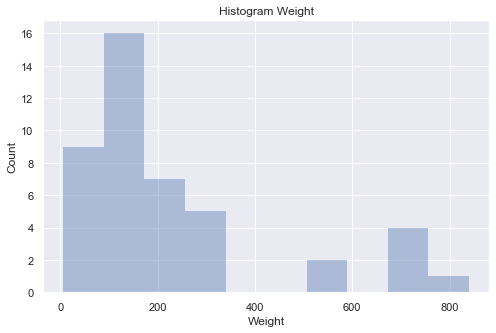

In [266]:
normFunc(fishEst['Weight'], 'Weight')

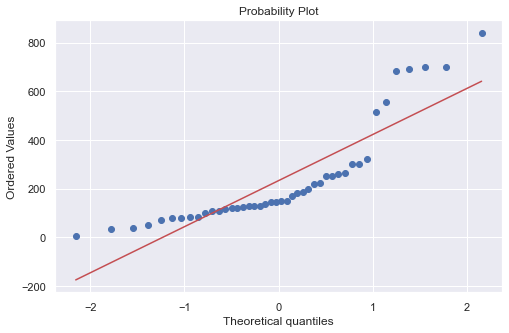

In [267]:
stats.probplot(fishEst['Weight'], dist="norm", plot=plt)
plt.show()

The Jarque-Bera normality test Vertical length
                         value
chi^2 test statistic  0.769213
chi^2 test p-value    0.680718


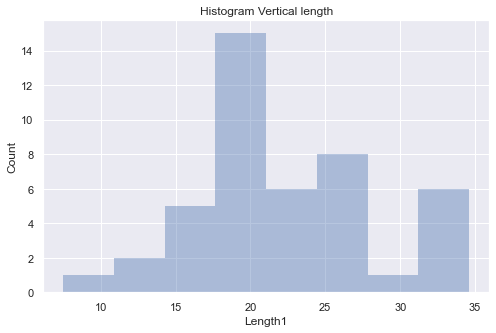

In [268]:
normFunc(fishEst['Length1'], 'Vertical length')

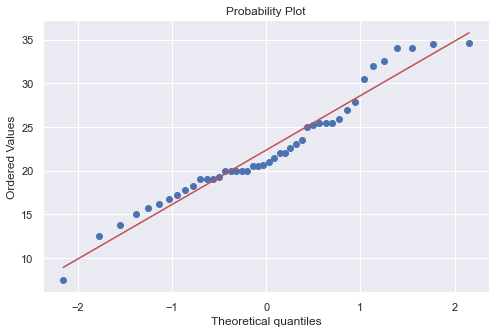

In [269]:
stats.probplot(fishEst['Length1'], dist="norm", plot=plt)
plt.show()

The Jarque-Bera normality test Diagonal length
                         value
chi^2 test statistic  0.498364
chi^2 test p-value    0.779438


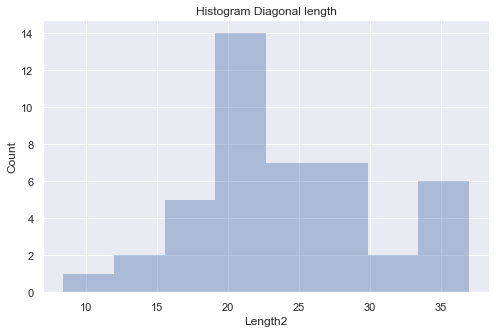

In [270]:
normFunc(fishEst['Length2'], 'Diagonal length')

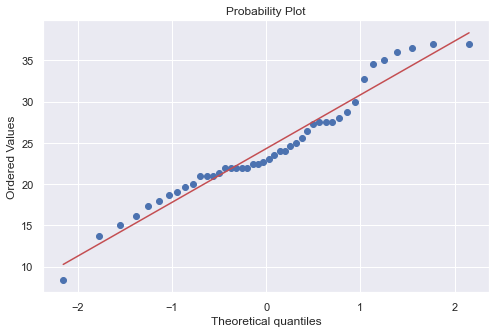

In [271]:
stats.probplot(fishEst['Length2'], dist="norm", plot=plt)
plt.show()

Both graphical and test results show that the vertical and diagonal length have normal distribution, while Weight's distribution is not normal.

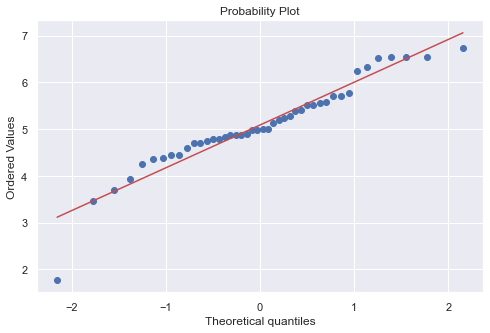

In [272]:
stats.probplot(fishEst['LogWeight'], dist="norm", plot=plt)
plt.show()

After log-transformation, the log(Weight) according to graphical analysis has normal distribution.

Checking the correlation between variables:
- Correlation between Weight and Height
- Correlation between Weight and Length1
- Correlation between Weight and Width

In [273]:
coefPears, pvPears = stats.pearsonr(fishEst['Weight'], fishEst['Height'])

print("Pearson's correlation coefficient = ", round(coefPears,3))
print("Pearson's p-value = ", round(pvPears,3))

Pearson's correlation coefficient =  0.953
Pearson's p-value =  0.0


In [274]:
coefPears, pvPears = stats.pearsonr(fishEst['Weight'], fishEst['Length1'])

print("Pearson's correlation coefficient = ", round(coefPears,3))
print("Pearson's p-value = ", round(pvPears,3))

Pearson's correlation coefficient =  0.923
Pearson's p-value =  0.0


In [275]:
coefPears, pvPears = stats.pearsonr(fishEst['Weight'], fishEst['Width'])

print("Pearson's correlation coefficient = ", round(coefPears,3))
print("Pearson's p-value = ", round(pvPears,3))

Pearson's correlation coefficient =  0.963
Pearson's p-value =  0.0


The Pearson correlation coefficient shows, that the correlation between all pairs of variables is significantly positive (close to 90%).

### Building regression model ###
The first model suppose that Weight of the fish is influenced by all variables (lengths(1-3), width, height).
The second model suppose the lognormal variables.

Here there is also a need to check for disturbances normality and homoskedasticity, overall model significance

In [276]:
model1 = ols('Weight ~ Length1 + Length2 + Length3 + Width + Height', fishEst).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     159.1
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           2.13e-24
Time:                        09:03:08   Log-Likelihood:                -229.08
No. Observations:                  44   AIC:                             470.2
Df Residuals:                      38   BIC:                             480.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -227.4553     47.185     -4.820      0.000    -322.977    -131.934
Length1      156.3017     39.013      4.006      0.000      77.325     235.279
Length2     -213.1284     57.363     -3.715      0.001    -329.253     -97.004
Length3       53.0039     35.017      1.514      0.138     -17.885     123.893
Width        114.4457     26.006      4.401      0.000      61.800     167.091
Height        46.8247     20.079      2.332      0.025       6.178      87.472
==============================================================================
Omnibus:                        5.252   Durbin-Watson:                   1.141
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.521
Skew:                           0.458   Prob(JB):                        0.104
Kurtosis:                       4.275   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

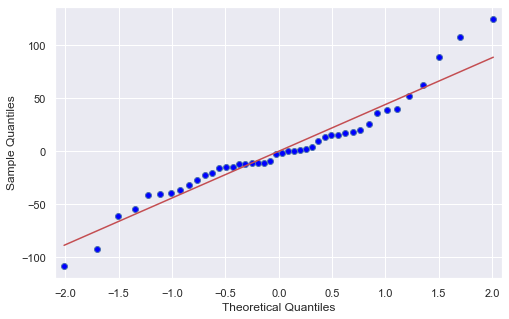

In [277]:
resids1 = model1.resid
qqplot(resids1, line='s');

In [278]:
reset1 = reset_ramsey(model1, degree=3)
print(reset1)

<F test: F=array([[71.79011485]]), p=2.733956529032911e-13, df_denom=36, df_num=2>


In the first model, all coefficients except Length3 turned out to be significant. The residuals are normally distributed and homoskedastic. However, according to RESET test the model specification is poor. So, we need to try the second model with log-transformation.

In [279]:
model2 = ols('LogWeight ~ LogLength1 + LogLength2 + Length3 + Width + LogHeight', fishEst).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LogWeight   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     987.2
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           4.07e-39
Time:                        09:03:24   Log-Likelihood:                 48.666
No. Observations:                  44   AIC:                            -85.33
Df Residuals:                      38   BIC:                            -74.63
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8810      0.594     -6.537      0.000      -5.083      -2.679
LogLength1     0.4332      1.687      0.257      0.799      -2.983       3.849
LogLength2     2.0413      1.700      1.201      0.237      -1.400       5.482
Length3       -0.0307      0.015     -2.019      0.051      -0.062    8.96e-05
Width          0.1316      0.045      2.911      0.006       0.040       0.223
LogHeight      0.7852      0.235      3.344      0.002       0.310       1.261
==============================================================================
Omnibus:                        6.505   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                5.332
Skew:                           0.688   Prob(JB):                       0.0695
Kurtosis:                       4.008   Cond. No.                     5.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [280]:
reset2 = reset_ramsey(model2, degree=3)
print(reset2)

<F test: F=array([[0.83701018]]), p=0.44125494601595594, df_denom=36, df_num=2>


The second model performs better according to RESET test, and to the adjusted R-squared. The residuals are normally distributed and homoskedastic. However, here we have only 2 significant coefficients and the problem of multicollinearity. So, we should take it into account.

However, further lets test the second model for prediction.

In [281]:
pred = model2.get_prediction(fishTest, weights=1).summary_frame(alpha=0.05).round(4)
pred = np.exp(pred)

In [282]:
df = pd.DataFrame()
df['True'] = fishTest['Weight']
df = df.reset_index()
df['Predicted'] = pred['mean']
df = df.drop(columns = 'index')

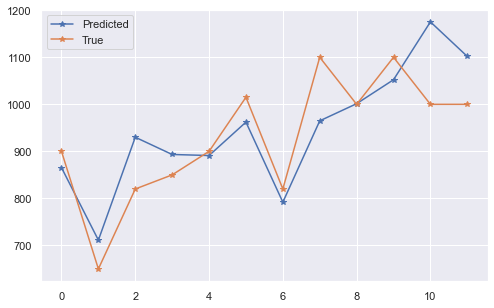

In [283]:
plt.plot('Predicted', data = df, linestyle = '-', marker = '*')
plt.plot('True', data = df, linestyle = '-', marker = '*')
plt.legend()
plt.show()

It can be seen that the model predict the values in major cases closely to true, but for some values there is quite high difference in predicted and true values. 
The model should be improved in order to obtain more accurate results (the multicollinearity should be controlled and some variables should be eliminated).

## KNN Analysis ##
In this task we want to apply KNN classifier to financial data. As a data source YahooFinance is used.

             Open        High         Low       Close  Open-Close    High-Low
count  253.000000  253.000000  253.000000  253.000000  253.000000  253.000000
mean   116.521976  117.972925  115.005534  116.498932    0.023044    2.967391
std     11.875965   11.437334   12.051416   11.697367    2.237908    1.868568
min     76.910004   80.570000   71.660004   72.860001   -7.559998    0.470001
25%    107.720001  108.639999  106.779999  107.820000   -1.090012    1.720001
50%    117.779999  118.889999  115.699997  117.550003   -0.129997    2.480003
75%    126.559998  127.720001  125.339996  126.440002    1.060005    3.570000
max    139.500000  139.500000  135.000000  137.279999    9.820007   10.650002


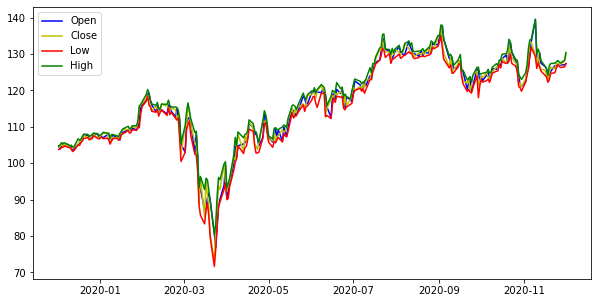

In [8]:
from pandas_datareader import data as pdr
import yfinance as yf

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pdr.get_data_yahoo('NDAQ', '2019-12-01', '2020-12-01')
df = df.dropna()
df = df[['Open', 'High', 'Low','Close']]

df['Open-Close']= df.Open - df.Close
df['High-Low']  = df.High - df.Low
df = df.dropna()

X = df[['Open-Close', 'High-Low']]
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)

print(df.describe())

opens = df[['Open']]
closes = df[['Close']]
lows = df[['Low']]
highs = df[['High']]

plt.figure(figsize=(10,5))
plt.plot(opens, color='b',label = 'Open')
plt.plot(closes, color='y',label = 'Close')
plt.plot(lows, color='r',label = 'Low')
plt.plot(highs, color='g',label = 'High')
plt.legend()
plt.show()

Train_data Accuracy: 0.76
Test_data Accuracy: 0.53


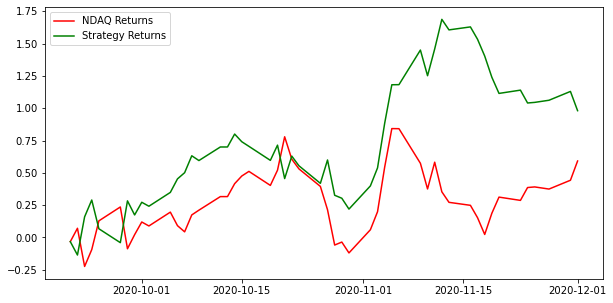

Sharpe ratio: 0.94


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from pandas_datareader import data as pdr
import yfinance as yf

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pdr.get_data_yahoo('NDAQ', '2019-12-01', '2020-12-01')
df = df.dropna()
df = df[['Open', 'High', 'Low','Close']]

df['Open-Close']= df.Open - df.Close
df['High-Low']  = df.High - df.Low
df = df.dropna()

X = df[['Open-Close', 'High-Low']]
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)

split_percentage = 0.80
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

df['Predicted_Signal'] = knn.predict(X)

df['NDAQ_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_NDAQ_returns = df[split:]['NDAQ_returns'].cumsum()*10

df['Startegy_returns'] = df['NDAQ_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = df[split:]['Startegy_returns'].cumsum()*10

plt.figure(figsize=(10,5))
plt.plot(Cumulative_NDAQ_returns, color='r',label = 'NDAQ Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_NDAQ_returns)/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f'%Sharpe )